## Computer Vision Example Using MNIST Data

In [17]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [18]:
fmnist = tf.keras.datasets.fashion_mnist

In [19]:
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


In [20]:
import numpy as np
np.set_printoptions(linewidth=200)

import matplotlib.pyplot as plt


[[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.    

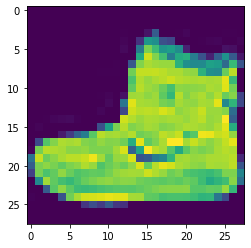

In [22]:
plt.imshow(training_images[0])

print (training_images[0])
print(training_labels[0])

training_images  = training_images / 255.0
test_images = test_images / 255.0

In [23]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [24]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [40]:
class mycallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs['accuracy'] >0.85):
            print ("\nReached 85% accuracy. So stopping training")
            self.model.stop_training = True

In [41]:
callbacks = mycallback()
model.fit(training_images, training_labels, epochs=5, callbacks = [callbacks])


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3845 - accuracy: 0.8639

In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1419 - accuracy: 0.9581

[0.14193175733089447, 0.9581000208854675]

In [11]:
classifications = model.predict(test_images)

Additional function to retrieve the index of the Array with max value
The softmax above gives a list with 10 items
Of which the max value -- highest probability is to be taken
If Index 3 has max then it means that the image is of type 3
Lets check the predicted value, as obtained above and labelled value

In [ ]:
def IndexOfMax(a):
    arr = np.array(a)
    result = np.where(arr == np.amax(arr))
    print("Predicted Type =", result[0][0])

In [13]:
for i in range(10):
    print("Label=", test_labels[i])
    IndexOfMax(classifications[i])





Predicted Type= 7
Label= 7
Predicted Type= 2
Label= 2
Predicted Type= 1
Label= 1
Predicted Type= 0
Label= 0
Predicted Type= 4
Label= 4
Predicted Type= 1
Label= 1
Predicted Type= 4
Label= 4
Predicted Type= 9
Label= 9
Predicted Type= 5
Label= 6
Predicted Type= 9
Label= 9
